# 1 Setting Up

In [4]:
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 2 loading data

In [7]:
data_dir = "D:/ImageClassification/MaskClassification/assets"

In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_dir) #where data load

Found 1376 files belonging to 2 classes.


# 2 Preprocessing

# 2.1 Scale data

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
scaled_iterator = data.as_numpy_iterator() #which allow as to pull data

In [11]:
batch = scaled_iterator.next()             #loop through and pull the data

In [12]:
batch[0].max()

1.0

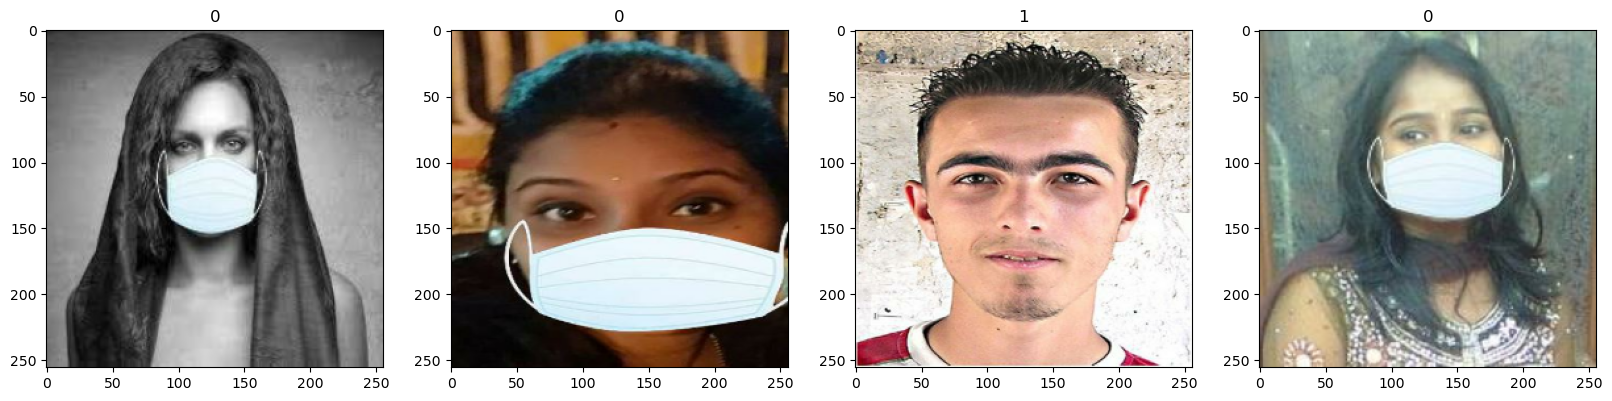

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 2.2 Spliting data 

In [14]:
len(data)

43

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [16]:
train_size + val_size + test_size

44

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3 Building Deep Learning Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
#Filter 16 filter of shape 3x3 , stride of 1, passthrough relu activitation
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu')) #another convolution block
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())#flattening the data down

model.add(Dense(256, activation='relu'))#256 value as output #Dense layer fully connected 
model.add(Dense(1, activation='sigmoid'))#1 value as output #that mean 0 or one cause sigmoid activation


Sigmoid activation take any input and covert it into a range between 0 and 1. In this case it would be Thai and Japan tattoo

Compilation for optimization had use adam,identify what loses in this case binary classification problem, the matrix want to track is accuracy.


is going to tell how well our model is classifying as either 0 or 1

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Taking the output from max pooling layar and flatening it. 
30x30x16
condense it down to single dimention instead of have muli dimention or multilayer

# 4 Training

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
#log at model training as it train

In [25]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
30/30 [==============================] - 22s 700ms/step - loss: 0.4497 - accuracy: 0.7865 - val_loss: 0.1933 - val_accuracy: 0.9271
Epoch 2/10
30/30 [==============================] - 21s 668ms/step - loss: 0.1259 - accuracy: 0.9583 - val_loss: 0.0930 - val_accuracy: 0.9688
Epoch 3/10
30/30 [==============================] - 20s 662ms/step - loss: 0.0902 - accuracy: 0.9740 - val_loss: 0.1057 - val_accuracy: 0.9514
Epoch 4/10
30/30 [==============================] - 20s 660ms/step - loss: 0.0661 - accuracy: 0.9812 - val_loss: 0.0764 - val_accuracy: 0.9688
Epoch 5/10
30/30 [==============================] - 21s 674ms/step - loss: 0.0516 - accuracy: 0.9844 - val_loss: 0.0594 - val_accuracy: 0.9792
Epoch 6/10
30/30 [==============================] - 20s 661ms/step - loss: 0.0335 - accuracy: 0.9885 - val_loss: 0.0291 - val_accuracy: 0.9896
Epoch 7/10
30/30 [==============================] - 20s 658ms/step - loss: 0.0311 - accuracy: 0.9885 - val_loss: 0.0268 - val_accuracy: 0.9826

#fit is training component, training data, epochs how long going to go and train for
#one epoch is one run over our entire training set of data
#pass validation data, going to run evalution on that validation data in order to see how well the model perform in real time

Putting into hist variable able to take out all the information from training data and validation data

In [26]:
hist

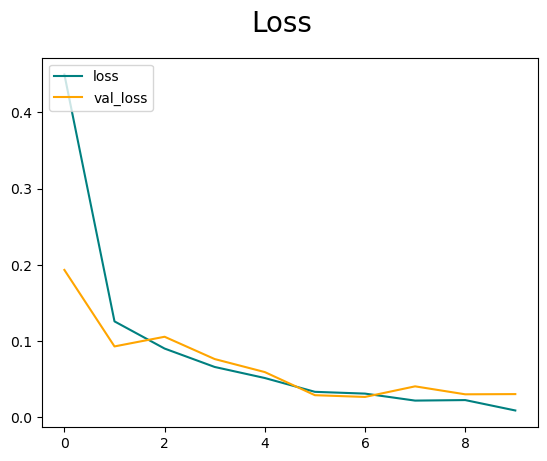

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

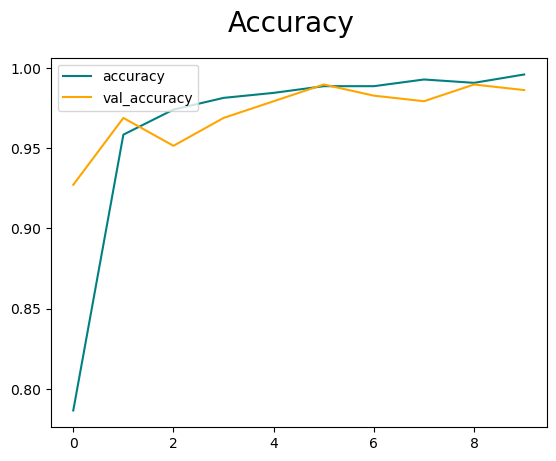

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 5 Evaluate Performance

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [32]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision:1.0, Recall:0.9833333492279053, Accuracy:0.9921875


# 6 Testing

In [35]:
import cv2

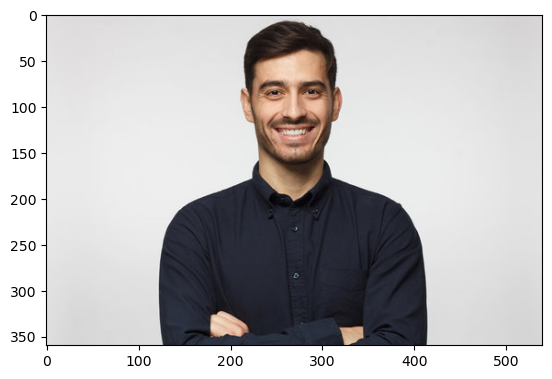

In [36]:
img = cv2.imread('D:/ImageClassification/MaskClassification/testing/nomask.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

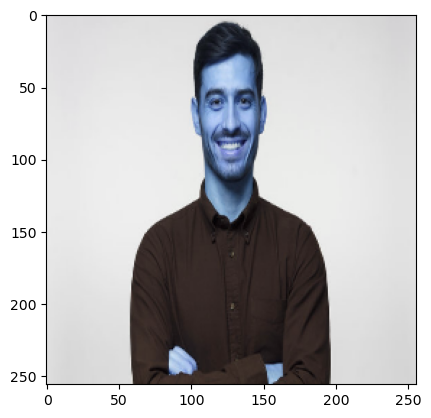

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
resize.shape

TensorShape([256, 256, 3])

In [39]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [40]:
Result = model.predict(np.expand_dims(resize/255, 0))

In [41]:
Result

array([[0.9755161]], dtype=float32)

In [42]:
if Result > 0.5: 
    print(f'This person has no mask')
else:
    print(f'This person has mask')

This person has no mask


# 7 Saving model

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model.save(os.path.join('D:/ImageClassification','MaskClassification.h5'))